# Imports

In [ ]:
import pandas as pd
import numpy as np
import random

# Read Dataframe

In [ ]:
df = pd.read_csv('kick_starter.csv')

In [ ]:
df.shape

(378661, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Dataset Metadata

In [ ]:
# Columns:

# ID:                 Unique Kickstarter ID assigned to each project.
# name:               Name of the crowdfunding proposal.
# category:           Specific category of the project.
# main_category:      Parent category of the project.
# currency:           Original currency used for the financial goal.
# deadline:           Expiry date of the project.
# goal:               Financial goal of the project in the respective currency.
# launched:           Date when the project was launched.
# pledged:            Amount pledged towards the project before the deadline.
# state:              Current state of the project (e.g., success, fail, live).
# backers:            Number of backers supporting the project.
# country:            Country where the project is based.
# usd pledged:        Amount pledged converted to USD by Kickstarter.
# usd_pledged_real:   Amount pledged converted to USD by Fixer.io.
# usd_goal_real:      Goal amount converted to USD by Fixer.io.

In [ ]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Data Cleaning/ Preprocessing

* Perform any necessary data cleaning & engineering that renders your data
useable (i.e. handling
missing values, duplicates, classification, transformation...etc.)

### Check null values of each column.

In [ ]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [ ]:
df[df['usd pledged'].isnull()].sample(n=5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
370845,959621520,SMOOTHVIBEZ,Music,Music,USD,2015-06-26,4000.0,2015-05-27 22:15:27,0.0,undefined,0,"N,0""",NaN,0.0,4000.00
8428,1042565336,Ticket Buddy,Music,Music,GBP,2016-04-05,1000.0,2016-03-06 17:13:26,0.0,undefined,0,"N,0""",NaN,0.0,1407.54
299041,592855494,Gentleman's Essentials,Publishing,Publishing,EUR,2015-11-15,3000.0,2015-10-06 18:55:30,0.0,undefined,0,"N,0""",NaN,0.0,3206.40
18716,109485541,The Gifted Journey,Publishing,Publishing,USD,2016-05-11,1200.0,2016-03-12 17:27:03,46.0,failed,0,"N,0""",NaN,46.0,1200.00
139691,1709542345,DIVIDED E.P. (Aaron Zraik's first solo album),Music,Music,USD,2015-01-05,1800.0,2014-12-04 21:41:27,1900.0,undefined,0,"N,0""",NaN,1900.0,1800.00


Update the column name "usd pledged" to "usd_pledged"

In [ ]:
df.rename(columns={'usd pledged': 'usd_pledged'}, inplace=True)

Handle null values of the "name" column.

In [ ]:
# This column contains string values/ names, so we don't have to check if the column is numeric or a string or not.
# The value can have any datatype.
# So, we will simply drop the 4 rows with null values, as 4 out of 378661 is not much at all.
df.dropna(subset=['name'], inplace=True)
print('Null values: ', df['name'].isnull().sum())
print(df.shape)

# We see that we successfully dropped removed all null values in the "name" column.

Null values:  0
(378657, 15)


Handle null values of the "usd_pledged" column.

In [ ]:
# We will adress the null values in the 'usd_pledged',
# column by calculating exchange rates based on valid data points,
# and then imputing missing values using median exchange rates.

In [ ]:
# First, lets get some information on the columns that we will use.

In [ ]:
# Get all unique "curreny" values.
unique_currencies = df['currency'].unique()
print(unique_currencies)

# Just to get an overview of the different currecnies.

['GBP' 'USD' 'CAD' 'AUD' 'NOK' 'EUR' 'MXN' 'SEK' 'NZD' 'CHF' 'DKK' 'HKD'
 'SGD' 'JPY']


In [ ]:
# Get the frequency of each currency.
df.groupby('currency').size()

# Just to get an overview of the distribution of the different currencies.

currency
AUD      7950
CAD     14962
CHF       768
DKK      1129
EUR     17405
GBP     34131
HKD       618
JPY        40
MXN      1752
NOK       722
NZD      1475
SEK      1788
SGD       555
USD    295362
dtype: int64

In [ ]:
# Now, lets start with the imputation.

# STEPS:

# 0. Check that the columns that we will use are numeric.

# 1. Filter out rows where both "usd_pledged" and "pledged" are not zero.
# 2. Calculate exchange rates for valid rows.
# 3. Calculate median exchange rates for each currency. (Use Median because it's robust to outliers)
# 4. Impute missing values in 'usd_pledged' column.

In [ ]:
# STEP 0:
# First, we will check if the columns that we will use are all numeric.
df['pledged'] = pd.to_numeric(df['pledged'], errors='coerce', downcast='float')
df['usd_pledged'] = pd.to_numeric(df['usd_pledged'], errors='coerce', downcast='float')

print('Data Types:')
print(df['pledged'].dtypes)
print(df['usd_pledged'].dtypes)

Data Types:
float64
float64


In [ ]:
# STEP 1:
# Then, we will filter out rows where both "usd_pledged" and "pledged" are not zero.
# We do this because calculating 0 divided by 0 will result in an error or a NaN value. Same thing for dividing NaN with 0.
valid_rows = df[(df['usd_pledged'].notnull()) & (df['pledged'] != 0)]

In [ ]:
# STEP 2:
# Calculate exchange rates for the valid rows.
# We also must handle the case where we divide by 0 (divide by pledged and pledged is 0).
# This will cause an error or NaN value.
# So we will simply check if the original pledged value is 0, in that case the usd_pledged will be 0.
valid_rows['exchange_rate'] = valid_rows['usd_pledged'] / valid_rows['pledged']

<ipython-input-206-1c3681d6242f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_rows['exchange_rate'] = valid_rows['usd_pledged'] / valid_rows['pledged']


In [ ]:
# STEP 3:
# Calculate median exchange rates for each currency. (Use Median because it's robust to outliers)
median_exchange_rates = valid_rows.groupby('currency').apply(lambda x: np.median(x['exchange_rate'])).to_dict()
median_exchange_rates

# Those are the median exchange rates for each currency. (same exchange rates used by kickstarter)

{'AUD': 0.7488245172124266,
 'CAD': 0.79,
 'CHF': 0.5459701492537313,
 'DKK': 0.14595744680851064,
 'EUR': 1.064713259833891,
 'GBP': 1.523501520166418,
 'HKD': 0.029739109201015825,
 'JPY': 0.002276834760117117,
 'MXN': 0.001864351454064772,
 'NOK': 0.11752727272727273,
 'NZD': 0.6868627450980392,
 'SEK': 0.11632144375313985,
 'SGD': 0.15135727651017955,
 'USD': 1.0}

In [ ]:
# STEP 3.5:
# let's just quickly save the calculated kickstarter exchange rates as a new column in the dataframe.
df['median_exchange_rate'] = df['currency'].map(median_exchange_rates)

In [ ]:
# STEP 4:
# Impute missing values in 'usd_pledged' column.

def impute_usd_pledged(row):
    if pd.isnull(row['usd_pledged']):
        # Get the currency of the current row.
        currency = row['currency']
        # Get the median exchange rate for the current currency.
        median_exchange_rate = median_exchange_rates.get(currency, np.nan)
        # Calculate the missing 'usd_pledged' value using the median exchange rate.
        usd_pledged = row['pledged'] * median_exchange_rate
        return usd_pledged
    else:
        return row['usd_pledged']

# Apply the imputation function
df['usd_pledged'] = df.apply(impute_usd_pledged, axis=1)

In [ ]:
# Now, let's check if the imputation worked.

# Shape before imputation.
print('Shape before imputation: ', 378657)
# Shape after imputation.
print('Shape after imputation: ', df.shape)

# Check for null values after imputation.
print(df.isnull().sum())

Shape before imputation:  378657
Shape after imputation:  (378657, 16)
ID                      0
name                    0
category                0
main_category           0
currency                0
deadline                0
goal                    0
launched                0
pledged                 0
state                   0
backers                 0
country                 0
usd_pledged             0
usd_pledged_real        0
usd_goal_real           0
median_exchange_rate    0
dtype: int64


### Check the "name" column?

In [ ]:
df['name'].unique().size
# We will not check the name column as it contains too many values.
# Also, a name can be any sting value and doesn't have any value restrictions.
# So, no need to check it.

375764

### Check the category

In [ ]:
# Check that all values in the "category" column are valid categories.
df['category'].unique()

# We see that they are in fact all valid category values.

array(['Poetry', 'Narrative Film', 'Music', 'Film & Video', 'Restaurants',
       'Food', 'Drinks', 'Product Design', 'Documentary', 'Nonfiction',
       'Indie Rock', 'Crafts', 'Games', 'Tabletop Games', 'Design',
       'Comic Books', 'Art Books', 'Fashion', 'Childrenswear', 'Theater',
       'Comics', 'DIY', 'Webseries', 'Animation', 'Food Trucks',
       'Public Art', 'Illustration', 'Photography', 'Pop', 'People',
       'Art', 'Family', 'Fiction', 'Accessories', 'Rock', 'Hardware',
       'Software', 'Weaving', 'Gadgets', 'Web', 'Jazz', 'Ready-to-wear',
       'Festivals', 'Video Games', 'Anthologies', 'Publishing', 'Shorts',
       'Electronic Music', 'Radio & Podcasts', 'Apps', 'Cookbooks',
       'Apparel', 'Metal', 'Comedy', 'Hip-Hop', 'Periodicals', 'Dance',
       'Technology', 'Painting', 'World Music', 'Photobooks', 'Drama',
       'Architecture', 'Young Adult', 'Latin', 'Mobile Games', 'Flight',
       'Fine Art', 'Action', 'Playing Cards', 'Makerspaces', 'Punk',
       

### Check the "main_category" column

In [ ]:
# Check that all values in the "main_category" column are valid categories.
df['main_category'].unique()

# We see that they are in fact all valid category values.

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Design', 'Crafts',
       'Games', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

### Check the "currency" column

In [ ]:
# We already checked that column earlier.

### Check "Deadline" date format

In [ ]:
import datetime

In [ ]:
# Check if the "deadline" column is in the correct format.

for date in df['deadline']:
    try:
        # Parsing each date string to datetime object using the specified CORRECT format '%Y-%m-%d'.
        datetime.datetime.strptime(date, '%Y-%m-%d')
    except ValueError:
        # If an Error occurs, this means there is a date value with incorrect format.
        print(f"Invalid date format: {date}")
        break
else:
    # If no error occurs, this means all dates are corectly formatted.
    print("All dates are in the corect format.")

All dates are in the corect format.


In [ ]:
# Check if the "launched" column is in the correct format.

for date in df['launched']:
    try:
        # Parsing each date string to datetime object using the specified CORRECT format '%Y-%m-%d %H:%M:%S'.
        datetime.datetime.strptime(date, '%Y-%m-%d %H:%M:%S')
    except ValueError:
        # If an Error occurs, this means there is a date value with incorrect format.
        print(f"Invalid date format: {date}")
        break
else:
    # If no error occurs, this means all dates are corectly formatted.
    print("All dates are in the corect format.")

All dates are in the corect format.


### Check that the "goal" column contains all numeric values

In [ ]:
# We will type cast the values to numeric. If there are non-numeric values, an error will occur.
df['goal'] = pd.to_numeric(df['goal'])
print(df['goal'].dtypes)

# We did not get any errors!

float64


### Check that the "state" column contains valid values

In [ ]:
# Get all unique values in the "state" column.
df['state'].unique()

# We see that there is an "undefined" value in the "state" column.

array(['failed', 'canceled', 'successful', 'live', 'undefined',
       'suspended'], dtype=object)

In [ ]:
# Check the number of rows with the "undefined" value.
print((df['state'] == 'undefined').sum())

# As this is a column that cannot be easily imputed accurately,
# we will impute this column later on using mashine learning later on!

3562


### Check the "backers" column

In [ ]:
# We will type cast the values to numeric. If there are non-numeric values, an error will occur.
df['backers'] = pd.to_numeric(df['backers'])
print(df['backers'].dtypes)

# We did not get any errors!

int64


### Check the "country" column

In [ ]:
# Check that all values in the "country" column are valid categories.
df['country'].unique()

# We see that there is one invalid value...'N,0"' which is NaN.

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

In [ ]:
# Show the number of rows with N,0" as their value.
print(df[df['country'] == 'N,0"'].shape[0])

3797


In [ ]:
# We will replace all 'N,0' values with NaN.
df['country'].replace('N,0"', np.nan, inplace=True)

In [ ]:
# Now, let's check the number of nan values in that column.
print(df['country'].isnull().sum())

# As this is a column that cannot be easily imputed accurately,
# we will impute this column later on using mashine learning later on!

3797


## Impute the "state" and "country" column using mashine learning.

We will use the RandomForest Classifier for both!

### Imports

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### First, impute the "state" column


In [ ]:
# Check the shape before imputation. (to make sure the rows did not decrease)
df.shape

(378657, 16)

In [ ]:
# Work on a copy of the dataframe.
temp = df.copy()

# Prepare the X feature matrix and the y label matrix.
# We will exclude some columns from the feature set.
X = temp.drop(columns=['ID',            # Irrelevant
                     'name',          # Too many unique values
                     'category',      # Too many unique values
                     'state',         # That's the y label
                     'country',       # Has null values
                     'main_category', # Irrelevant for now
                     'currency',      # Irrelevant for now
                     'deadline',      # Irrelevant for now
                     'launched'])     # Irrelevant for now
y = temp['state']

# # Identify rows with 'state' as 'undefined'.
undefined_indices = temp.index[temp['state'] == 'undefined']

# # Remove these rows from training data, so that we don't train on these invalid rows.
X_train = X.drop(undefined_indices)
y_train = y.drop(undefined_indices)

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train Random Forest classifier.
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predict the missing 'state' values for testing data.
predicted_states = clf.predict(X_test)

# Check accuracy of imputation.
accuracy = accuracy_score(y_test, predicted_states)
print("Accuracy:", accuracy)

# We see that the accuracy is very good!

Accuracy: 0.8681667310947894


In [ ]:
# Now, predict the missing 'state' values for the rows with 'undefined'.
predicted_states = clf.predict(X.loc[undefined_indices])


# Create a temporary DataFrame.
temporary_df = pd.DataFrame(predicted_states, columns=['Predicted_State'])

# Group by the predicted states and count their occurrences.
state_counts = temporary_df['Predicted_State'].value_counts()

# Print the predicted values grouped by their count.
print("Predicted States and their Counts:")
print(state_counts)

# We see that we have predicted a variety of states.

Predicted States and their Counts:
Predicted_State
failed        1851
successful    1653
canceled        55
suspended        3
Name: count, dtype: int64


In [ ]:
# Impute the predictions into the origianl dataframe.
df.loc[undefined_indices, 'state'] = predicted_states

In [ ]:
# Get all unique values in the "state" column.
df['state'].unique()

# We see that we have successfully imputed the "undefined" value!

array(['failed', 'canceled', 'successful', 'live', 'suspended'],
      dtype=object)

In [ ]:
# Check the shape after imputation. (to make sure the rows did not decrease)
df.shape

(378657, 16)

### Now, let's impute the "country" column

In [ ]:
# Check the shape before imputation. (to make sure the rows did not decrease)
df.shape

(378657, 16)

In [ ]:
# Work on a copy of the dataframe.
temp = df.copy()

# Prepare the X feature matrix and the y label matrix.
# We will exclude some columns from the feature set.
X = temp.drop(columns=['ID',            # Irrelevant
                     'name',          # Too many unique values
                     'category',      # Too many unique values
                     'state',         # We can now use the "state" column as we fully imputed it
                     'country',       # That's the y label
                     'main_category', # Irrelevant for now
                     'currency',      # Irrelevant for now
                     'deadline',      # Irrelevant for now
                     'launched'])     # Irrelevant for now
y = temp['country']

# # Identify rows with 'country' as NaN'.
undefined_indices = temp.index[temp['country'].isnull()]

# # Remove these rows from training data, so that we don't train on these invalid rows.
X_train = X.drop(undefined_indices)
y_train = y.drop(undefined_indices)

# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train Random Forest classifier.
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predict the missing 'country' values for testing data.
predicted_countries = clf.predict(X_test)

# Check accuracy of imputation.
accuracy = accuracy_score(y_test, predicted_countries)
print("Accuracy:", accuracy)

# We see that the accuracy is nearly excellent!

Accuracy: 0.9650002667662594


In [ ]:
# Now, predict the missing 'country' values for the rows with NaN.
predicted_countries = clf.predict(X.loc[undefined_indices])

# Create a temporary DataFrame.
temporary_df = pd.DataFrame(predicted_countries, columns=['Predicted_Country'])

# Group by the predicted countries and count their occurrences.
country_counts = temporary_df['Predicted_Country'].value_counts()

# Print the predicted values grouped by their count.
print("Predicted Countries and their Counts:")
print(country_counts)

# We see that we have predicted a variety of countries.

Predicted Countries and their Counts:
Predicted_Country
US    2738
GB     460
CA     206
AU     111
DE      46
NL      42
IT      42
SE      31
FR      29
NZ      28
ES      20
DK      16
NO      14
CH       7
BE       3
IE       3
AT       1
Name: count, dtype: int64


In [ ]:
# Impute the predictions into the origianl dataframe.
df.loc[undefined_indices, 'country'] = predicted_countries

In [ ]:
# Check the number of null values in column "country"
print(df['country'].isnull().sum())

# We see that we have successfully imputed all NaN cells.

0


In [ ]:
# Check the shape after imputation. (to make sure the rows did not decrease)
df.shape

(378657, 16)

### Check for duplicates

In [ ]:
# Check for duplicated rows in the df
print(df.duplicated().sum())

# We see that we have no duplicated rows!

0


In [ ]:
df.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,median_exchange_rate
281968,504607218,Angels On Earth: Play for children,Young Adult,Publishing,USD,2015-05-26,7987.0,2015-04-28 22:37:37,0.0,failed,0,US,0.0,0.0,7987.00,1.000000
99442,1504812325,Always Remembering A true story of love and war,Nonfiction,Publishing,USD,2015-02-12,4000.0,2015-01-13 02:11:46,1301.0,failed,12,US,1301.0,1301.0,4000.00,1.000000
13731,1069093288,The tea cosy cafe,Small Batch,Food,GBP,2015-04-20,40000.0,2015-04-10 17:11:46,0.0,failed,0,GB,0.0,0.0,60477.77,1.523502
284999,519943250,2012 Reading is Sexy Calendar,Photography,Photography,USD,2011-04-23,2500.0,2011-02-21 05:40:49,2621.0,successful,25,US,2621.0,2621.0,2500.00,1.000000
192682,1980502844,Crime novel MURDER WITH SARCASTIC INTENT,Fiction,Publishing,USD,2011-10-21,1000.0,2011-09-21 16:50:57,0.0,failed,0,US,0.0,0.0,1000.00,1.000000


# Spark queries

Perform 3 queries that provide different insights about the data.

In [ ]:
!pip install pyspark
!pip install findspark
!pip install pandas
!pip install joypy

In [ ]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from joypy import joyplot

spark set up

In [ ]:
# Creating a spark context class.
# sc = SparkContext()

# Creating a spark session.
spark = SparkSession \
    .builder \
    .appName("kickstarter Dataset") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
spark

In [ ]:
sdf = spark.createDataFrame(df)

new_columns = [c.replace(' ', '_') for c in sdf.columns]
sdf = sdf.toDF(*new_columns)
# print the spark dataframe schema.
sdf.printSchema()

root
 |-- ID: long (nullable = true)
 |-- name: string (nullable = true)
 |-- category: string (nullable = true)
 |-- main_category: string (nullable = true)
 |-- currency: string (nullable = true)
 |-- deadline: string (nullable = true)
 |-- goal: double (nullable = true)
 |-- launched: string (nullable = true)
 |-- pledged: double (nullable = true)
 |-- state: string (nullable = true)
 |-- backers: long (nullable = true)
 |-- country: string (nullable = true)
 |-- usd_pledged: double (nullable = true)
 |-- usd_pledged_real: double (nullable = true)
 |-- usd_goal_real: double (nullable = true)
 |-- median_exchange_rate: double (nullable = true)



In [ ]:
sdf.show(2)

+----------+--------------------+--------------+-------------+--------+----------+-------+-------------------+-------+------+-------+-------+-----------+----------------+-------------+--------------------+
|        ID|                name|      category|main_category|currency|  deadline|   goal|           launched|pledged| state|backers|country|usd_pledged|usd_pledged_real|usd_goal_real|median_exchange_rate|
+----------+--------------------+--------------+-------------+--------+----------+-------+-------------------+-------+------+-------+-------+-----------+----------------+-------------+--------------------+
|1000002330|The Songs of Adel...|        Poetry|   Publishing|     GBP|2015-10-09| 1000.0|2015-08-11 12:12:28|    0.0|failed|      0|     GB|        0.0|             0.0|      1533.95|   1.523501520166418|
|1000003930|Greeting From Ear...|Narrative Film| Film & Video|     USD|2017-11-01|30000.0|2017-09-02 04:43:57| 2421.0|failed|     15|     US|      100.0|          2421.0|      

In [ ]:
sdf.count()

378657

1.1) let's check top 5 categories that succeed and in the highest on get top 3 category that succeed

In [ ]:
import pyspark.sql.functions as function
top_5_main = sdf.filter(sdf.state == 'successful').groupBy('main_category').agg(function.count('main_category').alias('result')).sort(function.desc('result'))
top_5_main.show(5)

+-------------+------+
|main_category|result|
+-------------+------+
|        Music| 25494|
| Film & Video| 23977|
|        Games| 12519|
|   Publishing| 12300|
|          Art| 11510|
+-------------+------+
only showing top 5 rows



1.2) now  get top 3 category from the highest main_category

In [ ]:
# get highest one

first_main_category = top_5_main.select('main_category').first()[0]
first_main_category

'Music'

In [ ]:
# get top 3 categories for this one
top_3 = sdf.filter(sdf.main_category == first_main_category).groupBy('category').agg(function.count('category').alias('result')).sort(function.desc('result'))
top_5_main.show(3)

+-------------+------+
|main_category|result|
+-------------+------+
|        Music| 25494|
| Film & Video| 23977|
|        Games| 12519|
+-------------+------+
only showing top 3 rows



#This Bar Chart shows the top five categories by the number of successful projects

<ipython-input-253-ca761aaf67df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='result', y='main_category', data=top_5_main_pd, palette='viridis')


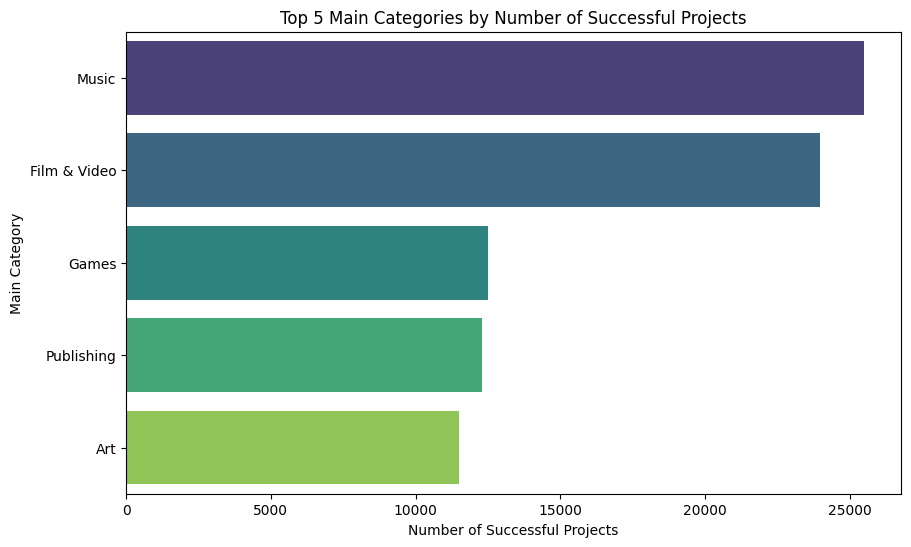

In [ ]:
# Convert the top 5 main categories DataFrame to a Pandas DataFrame
top_5_main_pd = top_5_main.limit(5).toPandas()

# Create a new figure for plotting with specified size
plt.figure(figsize=(10, 6))

# Create a bar plot using seaborn, with 'result' as the x-axis, 'main_category' as the y-axis,
# using the data from the top 5 main categories DataFrame, and choosing a color palette
sns.barplot(x='result', y='main_category', data=top_5_main_pd, palette='viridis')

# Add a title to the plot
plt.title('Top 5 Main Categories by Number of Successful Projects')

# Label the x-axis
plt.xlabel('Number of Successful Projects')

# Label the y-axis
plt.ylabel('Main Category')

# Display the plot
plt.show()


2 the avarage of the successed and failed  usd_goal_real

In [ ]:
average_success = sdf.filter(sdf.state == 'successful').select(function.avg('usd_goal_real')).collect()[0][0]
average_failed = sdf.filter(sdf.state == 'failed').select(function.avg('usd_goal_real')).collect()[0][0]

print(f"Average successful usd_goal_real: {average_success}")
print(f"Average failed usd_goal_real: {average_failed}")

Average successful usd_goal_real: 9465.398959361088
Average failed usd_goal_real: 62627.22433323148


Visualization using box plot

<ipython-input-255-25fd5441f2b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='state', y='usd_goal_real', data=df_filtered, palette='coolwarm')


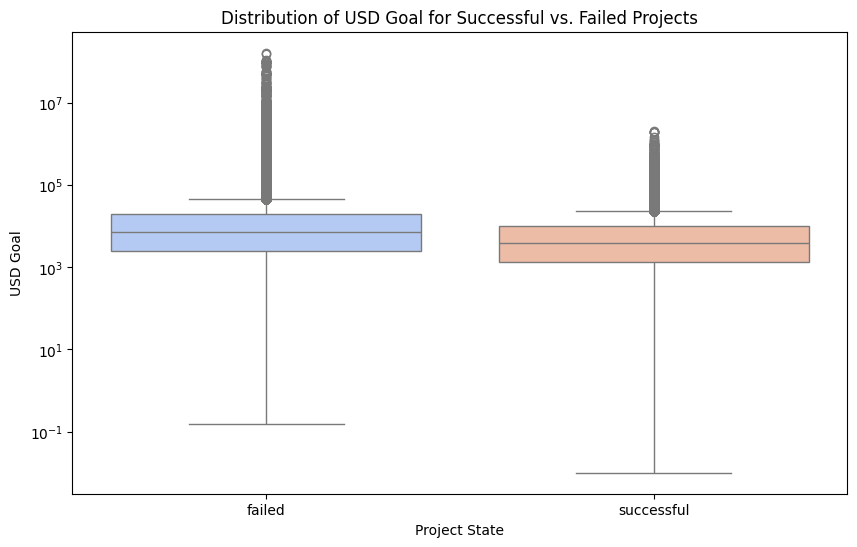

In [ ]:
df_filtered = df[df['state'].isin(['successful', 'failed'])]
plt.figure(figsize=(10, 6))
sns.boxplot(x='state', y='usd_goal_real', data=df_filtered, palette='coolwarm')
plt.title('Distribution of USD Goal for Successful vs. Failed Projects')
plt.xlabel('Project State')
plt.ylabel('USD Goal')
plt.yscale('log')  # Use log scale if there are large disparities in funding goals
plt.show()

3  the avarged collecting duration for successed ones


In [ ]:
average_duration = sdf.filter(sdf.state == 'successful').select(function.avg(function.datediff('deadline', 'launched'))).collect()[0][0]
print(f"Average collecting duration for successful projects: {average_duration} days")

Average collecting duration for successful projects: 32.146797041494295 days


4 sort countries by sucess rate


In [ ]:
country_success_rate = (
    sdf.groupBy("country")
    .agg(
        function.count("country").alias("total_projects"),
        function.sum(function.when(sdf["state"] == "successful", 1).otherwise(0)).alias("successful_projects"),
    )
    .withColumn("success_rate", function.round(function.col("successful_projects") / function.col("total_projects") * 100, 2))
    .sort(function.desc("success_rate"))
)
country_success_rate.show(10)

+-------+--------------+-------------------+------------+
|country|total_projects|successful_projects|success_rate|
+-------+--------------+-------------------+------------+
|     US|        295362|             110644|       37.46|
|     GB|         34131|              12291|       36.01|
|     HK|           618|                216|       34.95|
|     DK|          1129|                367|       32.51|
|     SG|           555|                178|       32.07|
|     NZ|          1475|                463|       31.39|
|     FR|          2968|                911|       30.69|
|     LU|            62|                 19|       30.65|
|     SE|          1788|                517|       28.91|
|     CA|         14962|               4210|       28.14|
+-------+--------------+-------------------+------------+
only showing top 10 rows



#Visualization using Line Chart shows from the highest to the lowest Top countries in the success rate of the projects

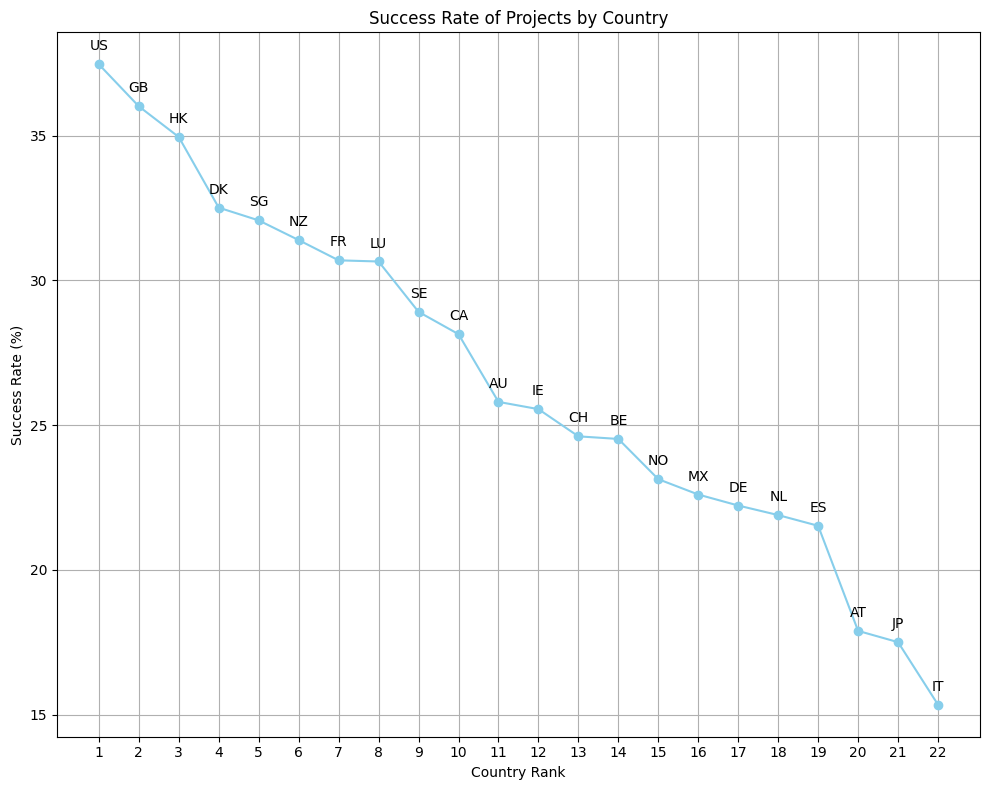

In [ ]:
# Extract the success rates of projects from the country_success_rate DataFrame
success_rates = country_success_rate.select("success_rate").rdd.flatMap(lambda x: x).collect()

# Extract the country names from the country_success_rate DataFrame
countries = country_success_rate.select("country").rdd.flatMap(lambda x: x).collect()

# Generate a range of ranks for the countries, starting from 1
country_ranks = range(1, len(countries) + 1)

# Create a new figure for plotting with specified size
plt.figure(figsize=(10, 8))

# Plot the success rates against the country ranks
# Use 'o' marker for data points, skyblue color for the line, and a solid line style
plt.plot(country_ranks, success_rates, marker='o', color='skyblue', linestyle='-')

# Annotate each point with the corresponding country name
for i, country in enumerate(countries):
    # Place the annotation slightly above the data point for better visibility
    plt.annotate(country, (country_ranks[i], success_rates[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Add a title to the plot
plt.title('Success Rate of Projects by Country')

# Label the x-axis
plt.xlabel('Country Rank')

# Label the y-axis
plt.ylabel('Success Rate (%)')

# Add a grid for better readability of the plot
plt.grid(True)

# Set the x-axis ticks to be the country ranks
plt.xticks(country_ranks)

# Adjust the layout to ensure everything fits without overlapping
plt.tight_layout()

# Display the plot
plt.show()


5*  the countries with highest success rate for project less than 10000 and others with goal larger than 10000*

In [ ]:
country_success_rate_low_goal = (
    sdf.filter(sdf["usd_goal_real"] < 10000)
    .groupBy("country")
    .agg(
        function.count("country").alias("total_projects"),
        function.sum(function.when(sdf["state"] == "successful", 1).otherwise(0)).alias("successful_projects"),
    )
    .withColumn("success_rate", function.round(function.col("successful_projects") / function.col("total_projects") * 100, 2))
    .sort(function.desc("success_rate"))
)

country_success_rate_high_goal = (
    sdf.filter(sdf["usd_goal_real"] >= 10000)
    .groupBy("country")
    .agg(
        function.count("country").alias("total_projects"),
        function.sum(function.when(sdf["state"] == "successful", 1).otherwise(0)).alias("successful_projects"),
    )
    .withColumn("success_rate", function.round(function.col("successful_projects") / function.col("total_projects") * 100, 2))
    .sort(function.desc("success_rate"))
)

print("Countries with highest success rate for projects less than $10,000:")
country_success_rate_low_goal.show(10)

print("Countries with highest success rate for projects greater than or equal to $10,000:")
country_success_rate_high_goal.show(10)

Countries with highest success rate for projects less than $10,000:
+-------+--------------+-------------------+------------+
|country|total_projects|successful_projects|success_rate|
+-------+--------------+-------------------+------------+
|     LU|            30|                 15|        50.0|
|     US|        181249|              81201|        44.8|
|     GB|         22925|              10029|       43.75|
|     HK|           318|                128|       40.25|
|     DK|           746|                286|       38.34|
|     NZ|           971|                369|        38.0|
|     FR|          1516|                572|       37.73|
|     SG|           359|                127|       35.38|
|     CA|          9689|               3367|       34.75|
|     SE|          1111|                379|       34.11|
+-------+--------------+-------------------+------------+
only showing top 10 rows

Countries with highest success rate for projects greater than or equal to $10,000:
+-------+--

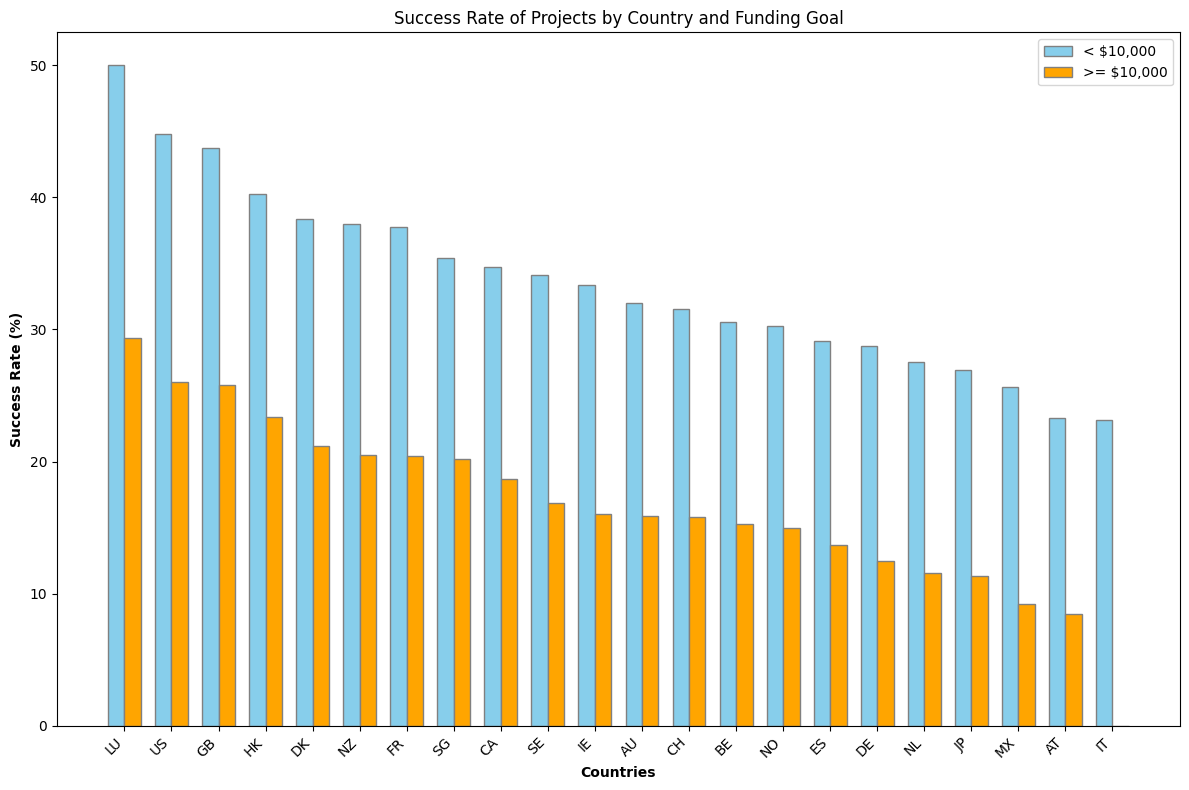

In [ ]:
# Extracting data for visualization - Low goal
countries_low_goal = country_success_rate_low_goal.select("country").rdd.flatMap(lambda x: x).collect()
success_rates_low_goal = country_success_rate_low_goal.select("success_rate").rdd.flatMap(lambda x: x).collect()

# Extracting data for visualization - High goal
countries_high_goal = country_success_rate_high_goal.select("country").rdd.flatMap(lambda x: x).collect()
success_rates_high_goal = country_success_rate_high_goal.select("success_rate").rdd.flatMap(lambda x: x).collect()

# Number of countries
num_countries = len(countries_low_goal)

# Set the width of the bars
bar_width = 0.35

# Set position of bar on X axis
r1 = np.arange(num_countries)
r2 = [x + bar_width for x in r1]

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(r1, success_rates_low_goal, color='skyblue', width=bar_width, edgecolor='grey', label='< $10,000')
plt.bar(r2, success_rates_high_goal, color='orange', width=bar_width, edgecolor='grey', label='>= $10,000')

# Adding xticks
plt.xlabel('Countries', fontweight='bold')
plt.ylabel('Success Rate (%)', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(num_countries)], countries_low_goal, rotation=45, ha='right')

# Adding legend
plt.legend()

# Adding labels
plt.title('Success Rate of Projects by Country and Funding Goal')
plt.tight_layout()

# Show plot
plt.show()

6  the countries that sucessed project in less than 20 days and others for more than 20 days as ratio noe number of projects

In [ ]:
# prompt: get the ratio  of usccess of countries for project less than 20 days and others more that 20 dayes

country_success_rate_less_than_20_days = (
    sdf.filter(function.datediff('deadline', 'launched') < 20)
    .groupBy("country")
    .agg(
        function.count("country").alias("total_projects"),
        function.sum(function.when(sdf["state"] == "successful", 1).otherwise(0)).alias("successful_projects"),
    )
    .withColumn("success_rate", function.round(function.col("successful_projects") / function.col("total_projects") * 100, 2))
    .sort(function.desc("success_rate"))
)

country_success_rate_more_than_20_days = (
    sdf.filter(function.datediff('deadline', 'launched') >= 20)
    .groupBy("country")
    .agg(
        function.count("country").alias("total_projects"),
        function.sum(function.when(sdf["state"] == "successful", 1).otherwise(0)).alias("successful_projects"),
    )
    .withColumn("success_rate", function.round(function.col("successful_projects") / function.col("total_projects") * 100, 2))
    .sort(function.desc("success_rate"))
)

print("Countries with highest success rate for projects less than 20 days:")
country_success_rate_less_than_20_days.show(10)

print("Countries with highest success rate for projects more than or equal to 20 days:")
country_success_rate_more_than_20_days.show(10)

Countries with highest success rate for projects less than 20 days:
+-------+--------------+-------------------+------------+
|country|total_projects|successful_projects|success_rate|
+-------+--------------+-------------------+------------+
|     HK|            36|                 21|       58.33|
|     NZ|           117|                 61|       52.14|
|     DK|            99|                 51|       51.52|
|     GB|          2767|               1389|        50.2|
|     US|         19715|               9861|       50.02|
|     LU|             6|                  3|        50.0|
|     SE|            96|                 41|       42.71|
|     FR|           140|                 55|       39.29|
|     IE|            49|                 19|       38.78|
|     CA|           788|                299|       37.94|
+-------+--------------+-------------------+------------+
only showing top 10 rows

Countries with highest success rate for projects more than or equal to 20 days:
+-------+-----

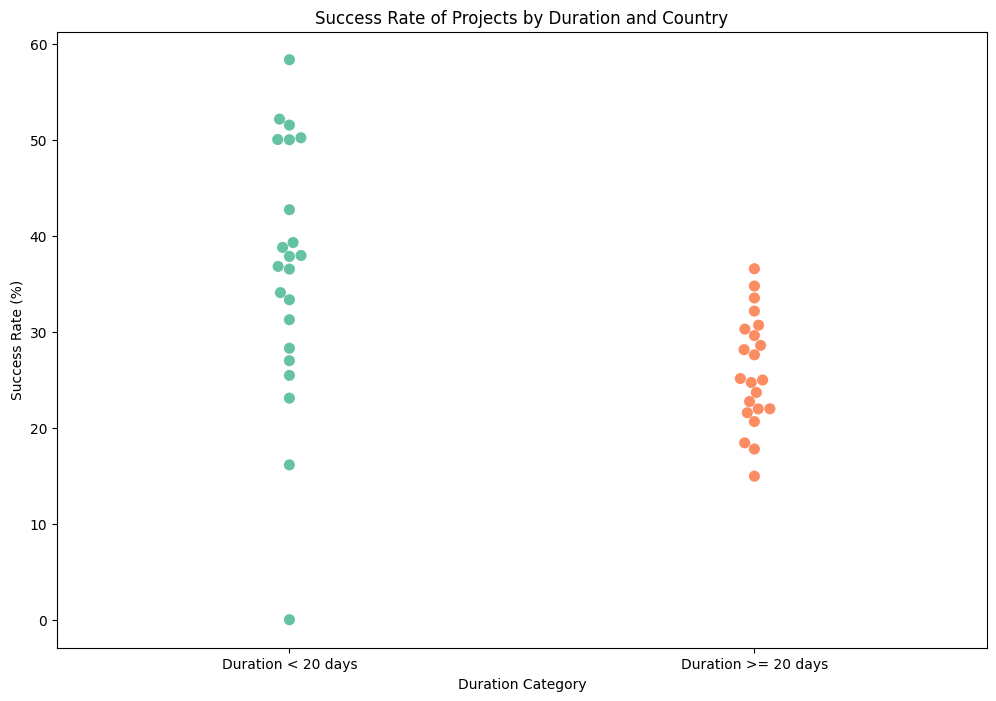

In [ ]:

# Extracting data for visualization - Less than 20 days
success_rates_less_than_20_days = country_success_rate_less_than_20_days.select("success_rate").rdd.flatMap(lambda x: x).collect()

# Extracting data for visualization - More than or equal to 20 days
success_rates_more_than_20_days = country_success_rate_more_than_20_days.select("success_rate").rdd.flatMap(lambda x: x).collect()

# Combining the data
data = {
    'Duration < 20 days': success_rates_less_than_20_days,
    'Duration >= 20 days': success_rates_more_than_20_days
}

# Creating the swarm plot
plt.figure(figsize=(12, 8))
sns.swarmplot(data=data, palette="Set2", size=8)

# Adding labels
plt.title('Success Rate of Projects by Duration and Country')
plt.xlabel('Duration Category')
plt.ylabel('Success Rate (%)')

# Show plot
plt.show()

--------------------------------

# SparkML

* Using SparkML, prepare data for Machine Learning by combining all the feature
columns into a
single vector column as input and produce at least 3 models to predict whether a project will be
successful or not.

* To prepare Target Column: First, examine the project states and convert
the "state" column into something usable as targets in a model. Drop projects that are "live" and
count "successful" states as outcome = 1, while combining every other state as outcome = 0.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier, NaiveBayes
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import when

Filter out "live" projects
Convert "state" to a binary target variable (successful = 1, others = 0)


In [ ]:
temp_sdf = sdf.select("*")

temp_sdf = temp_sdf.withColumn("label", when(temp_sdf.state == "successful", 1).otherwise(0))
temp_sdf = temp_sdf.filter(temp_sdf.state != "live")

temp_sdf.show()

+----------+--------------------+--------------+-------------+--------+----------+--------+-------------------+-------+----------+-------+-------+-----------+----------------+-------------+--------------------+-----+
|        ID|                name|      category|main_category|currency|  deadline|    goal|           launched|pledged|     state|backers|country|usd_pledged|usd_pledged_real|usd_goal_real|median_exchange_rate|label|
+----------+--------------------+--------------+-------------+--------+----------+--------+-------------------+-------+----------+-------+-------+-----------+----------------+-------------+--------------------+-----+
|1000002330|The Songs of Adel...|        Poetry|   Publishing|     GBP|2015-10-09|  1000.0|2015-08-11 12:12:28|    0.0|    failed|      0|     GB|        0.0|             0.0|      1533.95|   1.523501520166418|    0|
|1000003930|Greeting From Ear...|Narrative Film| Film & Video|     USD|2017-11-01| 30000.0|2017-09-02 04:43:57| 2421.0|    failed|  

In [ ]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

# Index categorical columns
indexers = [
    StringIndexer(inputCol="category", outputCol="category_index"),
    StringIndexer(inputCol="main_category", outputCol="main_category_index"),
    StringIndexer(inputCol="currency", outputCol="currency_index"),
    StringIndexer(inputCol="country", outputCol="country_index")
]

# Apply the indexers
for indexer in indexers:
    temp_sdf = indexer.fit(temp_sdf).transform(temp_sdf)

# Assemble feature columns into a single vector column
feature_columns = ["category_index", "main_category_index", "currency_index", "goal", "backers", "country_index", "usd_pledged_real", "usd_goal_real"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

temp_sdf = assembler.transform(temp_sdf)

In [ ]:
temp_sdf.show()

+----------+--------------------+--------------+-------------+--------+----------+--------+-------------------+-------+----------+-------+-------+-----------+----------------+-------------+--------------------+-----+--------------+-------------------+--------------+-------------+--------------------+
|        ID|                name|      category|main_category|currency|  deadline|    goal|           launched|pledged|     state|backers|country|usd_pledged|usd_pledged_real|usd_goal_real|median_exchange_rate|label|category_index|main_category_index|currency_index|country_index|            features|
+----------+--------------------+--------------+-------------+--------+----------+--------+-------------------+-------+----------+-------+-------+-----------+----------------+-------------+--------------------+-----+--------------+-------------------+--------------+-------------+--------------------+
|1000002330|The Songs of Adel...|        Poetry|   Publishing|     GBP|2015-10-09|  1000.0|201

Select only the necessary columns


In [ ]:
temp_sdf = temp_sdf.select("features", "label")
temp_sdf.show()

+--------------------+-----+
|            features|label|
+--------------------+-----+
|[62.0,2.0,1.0,100...|    0|
|[22.0,0.0,0.0,300...|    0|
|[22.0,0.0,0.0,450...|    0|
|[2.0,1.0,0.0,5000...|    0|
|[7.0,0.0,0.0,1950...|    0|
|[38.0,7.0,0.0,500...|    1|
|[6.0,7.0,0.0,1000...|    1|
|[45.0,7.0,0.0,250...|    0|
|[0.0,5.0,0.0,1250...|    0|
|[1.0,0.0,0.0,6500...|    0|
|[10.0,2.0,3.0,250...|    0|
|[21.0,1.0,0.0,125...|    1|
|(8,[0,1,3,7],[25....|    0|
|(8,[0,1,3,7],[32....|    0|
|[3.0,3.0,1.0,5000...|    1|
|[27.0,5.0,0.0,250...|    0|
|[40.0,10.0,0.0,15...|    0|
|[41.0,2.0,0.0,300...|    0|
|[2.0,1.0,0.0,250....|    1|
|[6.0,7.0,0.0,5000...|    0|
+--------------------+-----+
only showing top 20 rows



## Train Machine Learning Models

Split the data into training and test sets


In [ ]:
train, test = temp_sdf.randomSplit([0.7, 0.3], seed=42)

Logistic Regression:

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Initialize Logistic Regression model
lr = LogisticRegression(featuresCol="features", labelCol="label")

# Train the model
lr_model = lr.fit(train)

# Make predictions
lr_predictions = lr_model.transform(test)

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="label")
lr_auc = evaluator.evaluate(lr_predictions)
print(f"Logistic Regression AUC: {lr_auc}")

Logistic Regression AUC: 0.9962288091335645


Random Forest

In [ ]:
from pyspark.ml.classification import RandomForestClassifier

# Initialize Random Forest model
rf = RandomForestClassifier(featuresCol="features", labelCol="label", maxBins=160)

# Train the model
rf_model = rf.fit(train)

# Make predictions
rf_predictions = rf_model.transform(test)

# Evaluate the model
rf_auc = evaluator.evaluate(rf_predictions)
print(f"Random Forest AUC: {rf_auc}")

Random Forest AUC: 0.9948013568079468


Gradient-Boosted Trees

In [ ]:
from pyspark.ml.classification import GBTClassifier

# Initialize Gradient-Boosted Trees model
gbt = GBTClassifier(featuresCol="features", labelCol="label", maxBins=160)

# Train the model
gbt_model = gbt.fit(train)

# Make predictions
gbt_predictions = gbt_model.transform(test)

# Evaluate the model
gbt_auc = evaluator.evaluate(gbt_predictions)
print(f"Gradient-Boosted Trees AUC: {gbt_auc}")

Gradient-Boosted Trees AUC: 0.9982681431956395
